# Example for reading map-file for example Tol
The map.nc file is read and *variable* is extracted. Next, the mesh data for the final time-step is converted to a raster and saved to a .tiff 

## 1. Import modules

In [1]:
import os
import sys
from pathlib import Path

currentdir = os.path.dirname(os.getcwd())
sys.path.append(currentdir + r"/HydroLogic_Inundation_toolbox")
sys.path.append(currentdir + r"/HydroLogic_Inundation_toolbox/Readers")

from flowmeshreader import load_meta_data, load_map_data, mesh_to_tiff
from plotting import raster_plot_with_context

## 2. Set input and output paths

In [2]:
# set paths
input_file_path = r"D:\Work\Project\P1414\Models\Combined\V5c 10000m3\dflowfm\output\DFM_map.nc"
output_file_path = r"D:\Work\Project\P1414\Models\Combined\V5c 10000m3\dflowfm\output\final_waterdepth.tiff"
Path(currentdir + r"/HydroLogic_Inundation_toolbox/Data/Tol/output").mkdir(exist_ok=True)

## 3. Set output raster options

In [3]:
# raster options
resolution = 100  # m
distance_tol = 600  # m
interpolation = r"nearest"

## 4. Read meta-data and set variable to read from map.nc file

In [4]:
print(load_meta_data(input_file_path))
variable = r"Mesh2d_s0"

FileNotFoundError: [Errno 2] No such file or directory: b'D:\\Work\\Project\\P1414\\Models\\Combined\\V5c 10000m3\\dflowfm\\output\\DFM_map.nc'

## 5. Load map data from NetCDF file

In [10]:
# load mesh coordinates and data from netCDF 
map_data = load_map_data(input_file_path, variable)

## 6. Plot water depth at last time step

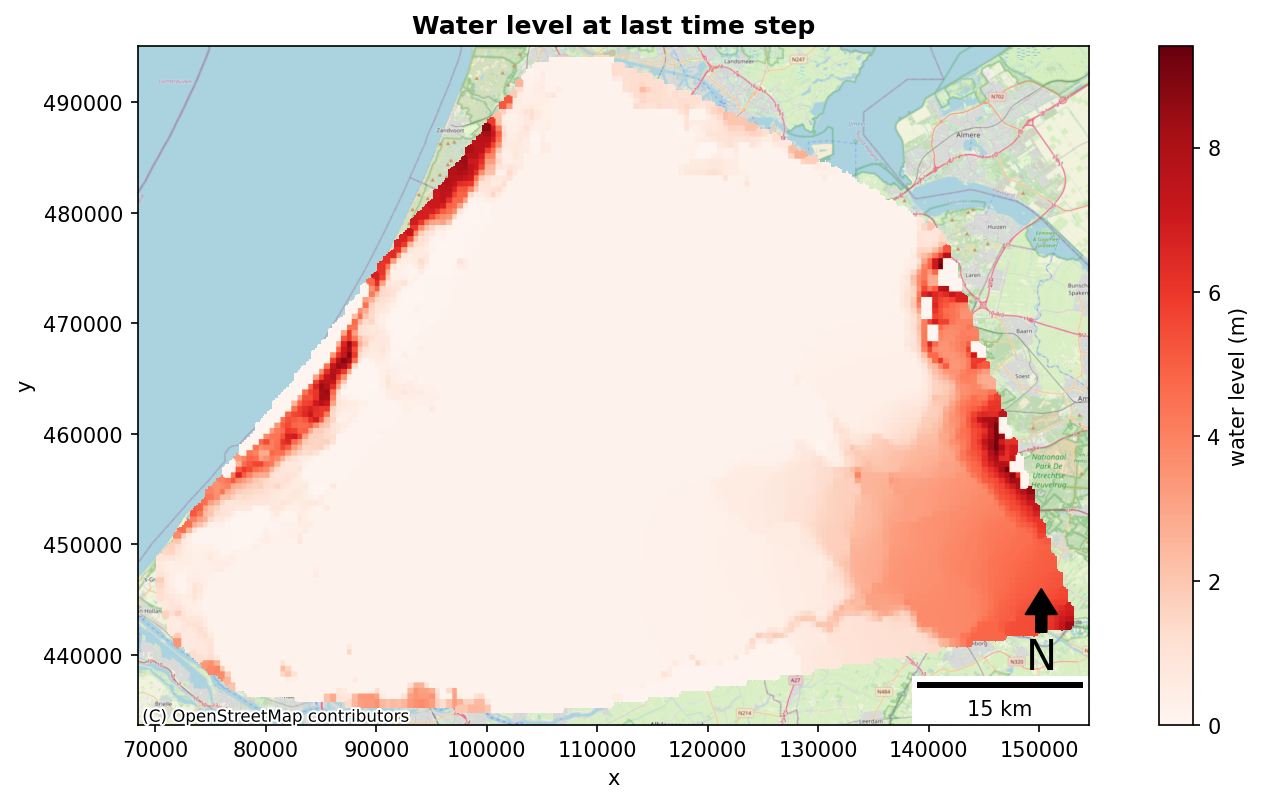

In [12]:
# convert to raster and save as tiff
_, _, grid_data = mesh_to_tiff(
    map_data[-1, :],
    input_file_path,
    output_file_path,
    resolution,
    distance_tol,
    interpolation=interpolation,
)
fig, ax = raster_plot_with_context(
    raster_path = output_file_path, 
    epsg = 28992, 
    clabel = "water level (m)", 
    cmap = "Reds", 
    title = "Water level at last time step",
    )